# Visualization of M&M output

A prototype to plot various M&M output information.

## Load a sample M&M output data-set

In [1]:
result_file = 'small_data_100_mixture01_1_oracle_generator_1_mnm_mixture01_1.rds'
meta_file = 'small_data_100_mixture01_1.pkl'

In [2]:
dat = readRDS(result_file)$result
names(dat)

[1] "alpha"           "mu"              "mu2"             "KL"             
 [5] "lbf"             "sigma2"          "V"               "elbo"           
 [9] "niter"           "fitted"          "coef"            "null_index"     
[13] "mixture_weights" "lfsr"            "intercept"       "sets"           
[17] "pip"             "m_init"

## SuSiE plot

We can directly call SuSiE plot function. Since it is simulated data we can add the true causal effects to it.

In [3]:
truth = dscrutils::read_dsc(meta_file)$meta$true_coef
true_pos = as.integer(apply(truth, 1, sum) != 0)
true_idx = which(truth != 0, arr.ind = TRUE)
true_idx

row,col
149,1
394,1
786,1
149,2
394,2
786,2
149,3
394,3
786,3
149,4


In [4]:
truth[which(truth!=0,arr.ind=T)[,1],]

0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165


In [5]:
dat$coef[-1,][true_idx]

[1]  5.540905e-05  8.971842e-03  4.446600e-02  3.703633e-05  5.543688e-03
 [6]  3.073868e-02  1.267170e-05  2.001803e-03  8.153000e-03 -1.549788e-05
[11] -1.666104e-03 -7.444080e-03  7.121739e-06  8.384508e-04  5.577863e-03

In [6]:
pdf('susie_plot_demo.pdf', width=10, height=5)
susieR::susie_plot(dat,y='PIP', main = 'Default SuSiE plot for cross-condition PIP', xlab = 'SNP positions', add_legend = T, b=true_pos)
dev.off()

png 
  2

> susie_plot_demo.pdf (11.0 KiB):

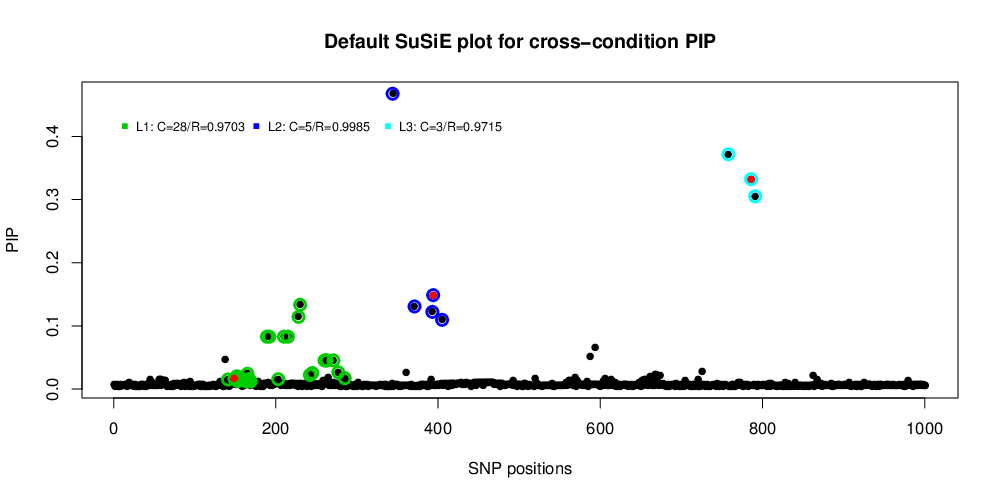

In [7]:
%preview susie_plot_demo.pdf -s png --dpi 100

## Bubble plot for estimated effect size

Effect size will be the color of the bubble:

In [8]:
dim(dat$coef[-1,]) # remove intercept

[1] 1001    5

PIP will be the size of the bubble:

In [9]:
variable_lfsr = mmbr::mmbr_get_lfsr(dat, weighted = F)
dim(variable_lfsr)

[1] 1001    5

In [10]:
dat$alpha[,c(149,394,786)]

1.222101e-02,4.685408e-22,4.867315e-22
1.329052e-18,1.449352e-01,1.341495e-18
8.447406e-17,7.957771e-17,3.293492e-01
6.533748e-04,6.382051e-04,6.487285e-04
6.537123e-04,6.385829e-04,6.490915e-04
6.537294e-04,6.385758e-04,6.490911e-04
6.535125e-04,6.382878e-04,6.488256e-04
6.532115e-04,6.378966e-04,6.484634e-04
6.529780e-04,6.375808e-04,6.481744e-04
6.529267e-04,6.374745e-04,6.480863e-04


Now get table of effect size estimates and PIP, for all conditions.

In [11]:
table = data.frame(matrix(NA, prod(dim(variable_lfsr)), 5))
colnames(table) = c('y', 'x', 'effect_size', 'mlog10lfsr', 'cs')

In [12]:
x_names = paste('variable', 1:nrow(variable_lfsr))
y_names = paste('condition', 1:ncol(variable_lfsr))
table$y = rep(y_names, length(x_names))
table$x = rep(x_names, each = length(y_names))
table$effect_size = as.vector(t(dat$coef[-1,]))
table$mlog10lfsr = -log10(as.vector(t(variable_lfsr)))
head(table)

y,x,effect_size,mlog10lfsr,cs
condition 1,variable 1,-7.276723e-08,20,NA
condition 2,variable 1,-2.049633e-07,20,NA
condition 3,variable 1,-5.576905e-08,20,NA
condition 4,variable 1,-1.468269e-08,20,NA
condition 5,variable 1,-1.410924e-08,20,NA
condition 1,variable 2,-1.476321e-08,20,NA


Now add CS to this table.

In [13]:
j = 1
for (i in dat$sets$cs_index) {
    variables = x_names[dat$sets$cs[[j]]]
    table[which(table$x %in% variables),]$cs = i
    j = j + 1
}
table = table[which(!is.na(table$cs)),]

In [14]:
dim(table)

[1] 180   5

And get colors for x-axis by CS,

In [15]:
xtable = unique(cbind(table$x, table$cs))

In [16]:
colors = rep('black', nrow(xtable))
for (i in unique(xtable[,2])) {
    colors[which(xtable[,2] == i)] = as.integer(i) + 2
}

In [17]:
library(ggplot2)
pdf('bubble_demo.pdf', width = length(unique(table$x)) * 0.5, height = length(unique(table$y)) * 0.9)
p = ggplot(table) + 
    geom_point(aes(x = x, y = y, colour = effect_size , size = mlog10lfsr)) +
    scale_x_discrete(limits = unique(table$x)) + 
    scale_y_discrete(limits = unique(table$y)) + 
    scale_color_gradient2(midpoint = 0, limit = c(-max(abs(table$effect_size)), max(abs(table$effect_size))), low="#022968", mid="white", high="#800000", space="Lab") + 
    labs(size="-log10(lfsr)", colour="Effect size") + 
    theme_minimal() + theme(text = element_text(face = "bold", size = 14), panel.grid = element_blank(), 
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 15, color = colors),
        axis.text.y = element_text(size = 15, color = "black"),
        axis.title.x = element_blank(), 
        axis.title.y = element_blank())
print(p)
dev.off()

png 
  2

> bubble_demo.pdf (6.4 KiB):

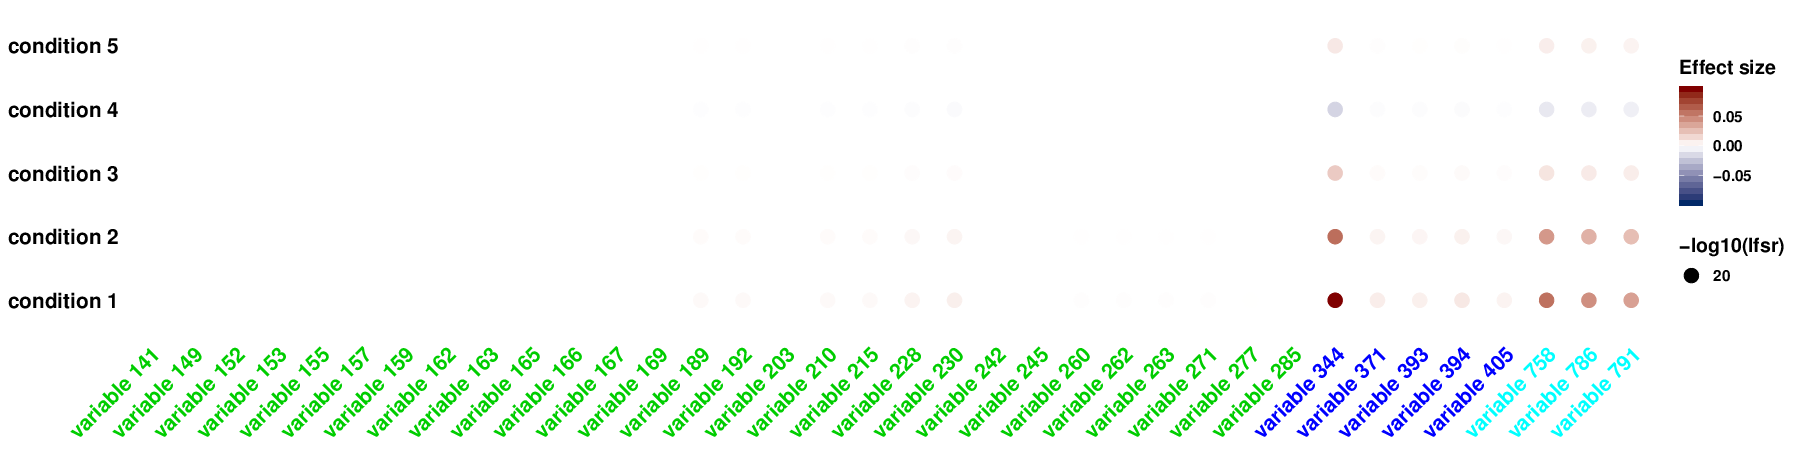

In [18]:
%preview bubble_demo.pdf -s png --dpi 100